# Contents
1. Imports
2. Checks
3. Transformation
4. Exports

# 1. Imports

In [7]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Path
path = r'/Users/davidgriesel/Documents/GitHub/202409_OGS'

In [9]:
#Dataset
df = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '06_merged_dataset.pkl'))

# 2. Checks

In [10]:
df.shape

(32403719, 22)

In [11]:
#Preview
df.head()

,order_id,user_id,user_order_count,order_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,product_id,add_to_cart_order,reordered,...,department_id,prices,gender,state,age,date_joined,number_of_dependants,marital_status,income,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,7,9.0,Female,Alabama,31,2019-02-17,3,married,40423,beverages
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,16,12.5,Female,Alabama,31,2019-02-17,3,married,40423,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,19,4.4,Female,Alabama,31,2019-02-17,3,married,40423,snacks
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,19,4.7,Female,Alabama,31,2019-02-17,3,married,40423,snacks
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,17,1.0,Female,Alabama,31,2019-02-17,3,married,40423,household


# 3. Transformation

## 2.1. Orders

### 2.1.1. order_day_of_week

In [12]:
# Frequency distribution of the variable 
df['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6203898
1    5660040
2    4213690
3    3840418
4    3783706
5    4205651
6    4496316
Name: count, dtype: int64

In [13]:
# Mapping numeric values to day names
day_mapping = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Apply the mapping to create a new column with day names
df['order_day_of_week'] = df['order_day_of_week'].map(day_mapping)

# Define the desired categorical order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert to an ordered categorical variable
df['order_day_of_week'] = pd.Categorical(df['order_day_of_week'], categories=day_order, ordered=True)

In [14]:
# Confirm dtype
print(df['order_day_of_week'].dtype)

category


In [15]:
# Count the number of orders per day
df['order_day_of_week'].value_counts().sort_index()

order_day_of_week
Monday       4213690
Tuesday      3840418
Wednesday    3783706
Thursday     4205651
Friday       4496316
Saturday     6203898
Sunday       5660040
Name: count, dtype: int64

<Axes: xlabel='order_day_of_week'>

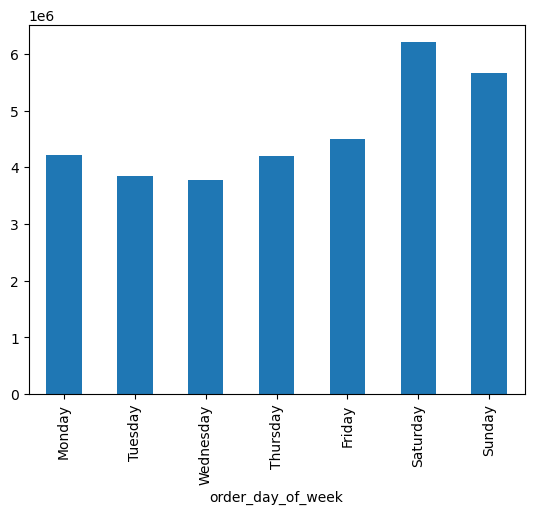

In [16]:
# Create a bar chart
df['order_day_of_week'].value_counts().sort_index().plot.bar()

### 2.1.2. busiest_days

In [17]:
#Create loop and place results in list
busiest_days = []

for value in df['order_day_of_week']:
    if value == 'Saturday' or value == 'Sunday':
        busiest_days.append('Most Busy Days')
    elif value == 'Tuesday' or value == 'Wednesday':
        busiest_days.append('Least Busy Days')
    else:
        busiest_days.append('Moderately Busy Days')

#Create new variable and set it equal to results of loop
df['busiest_days'] = busiest_days

# Define the desired categorical order
busiest_days_order = ['Least Busy Days', 'Moderately Busy Days', 'Most Busy Days']

# Convert to an ordered categorical variable
df['busiest_days'] = pd.Categorical(df['busiest_days'], categories=busiest_days_order, ordered=True)

In [18]:
# Dimensions
df.shape

(32403719, 23)

In [19]:
# Confirm dtype
print(df['busiest_days'].dtype)

category


In [20]:
# Frequency distribution of new variable
df['busiest_days'].value_counts(dropna=False).sort_index()

busiest_days
Least Busy Days          7624124
Moderately Busy Days    12915657
Most Busy Days          11863938
Name: count, dtype: int64

<Axes: xlabel='busiest_days'>

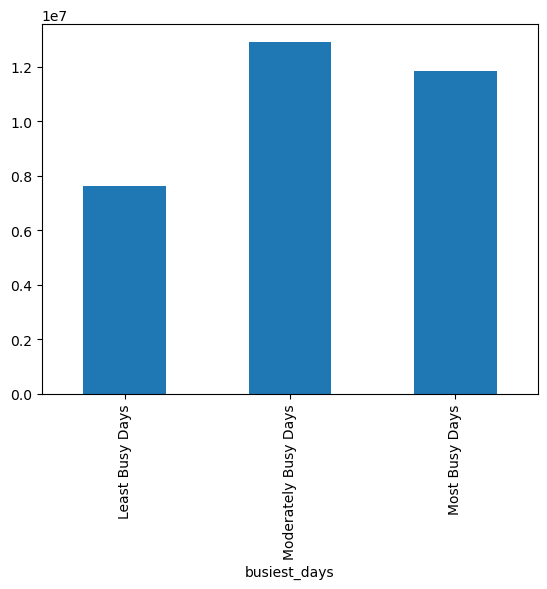

In [21]:
# Create a bar chart
df['busiest_days'].value_counts().sort_index().plot.bar()

### 2.1.3. order_hour_of_day

In [22]:
# Frequency distribution of the variable
df['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      218763
1      115698
2       69373
3       51281
4       53240
5       87957
6      290491
7      891026
8     1718082
9     2454127
10    2761660
11    2736010
12    2618430
13    2660846
14    2689036
15    2662044
16    2535106
17    2087564
18    1636436
19    1258275
20     976134
21     795619
22     634207
23     402314
Name: count, dtype: int64

In [23]:
# Define the desired categorical order (starting with Monday)
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# Convert to an ordered categorical variable
df['order_hour_of_day'] = pd.Categorical(df['order_hour_of_day'], categories=hour_order, ordered=True)

In [24]:
# Confirm dtype
print(df['order_hour_of_day'].dtype)

category


In [25]:
# Count the number of orders per day
df['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      218763
1      115698
2       69373
3       51281
4       53240
5       87957
6      290491
7      891026
8     1718082
9     2454127
10    2761660
11    2736010
12    2618430
13    2660846
14    2689036
15    2662044
16    2535106
17    2087564
18    1636436
19    1258275
20     976134
21     795619
22     634207
23     402314
Name: count, dtype: int64

<Axes: xlabel='order_hour_of_day'>

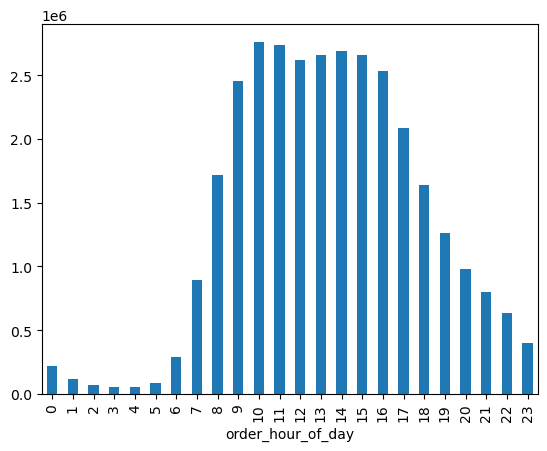

In [26]:
# Create a bar chart
df['order_hour_of_day'].value_counts().sort_index().plot.bar()

### 2.1.4. busiest_hours

In [27]:
#Create loop and place results in list
busiest_hours = []

for value in df['order_hour_of_day']:
    if value in [10, 11, 12, 13, 14, 15, 16]: # More than 2m orders
        busiest_hours.append('Most Busy Hours')
    elif value in [0, 1, 2, 3, 4, 5, 6]: #less than 500k orders
        busiest_hours.append('Least Busy Hours')
    else:
        busiest_hours.append('Moderately Busy Hours')

#Create new variable and set it equal to results of loop
df['busiest_hours'] = busiest_hours

# Define the desired categorical order
busiest_hours_order = ['Least Busy Hours', 'Moderately Busy Hours', 'Most Busy Hours']

# Convert to an ordered categorical variable
df['busiest_hours'] = pd.Categorical(df['busiest_hours'], categories=busiest_hours_order, ordered=True)

In [28]:
# Dimensions
df.shape

(32403719, 24)

In [29]:
# Confirm dtype
print(df['busiest_hours'].dtype)

category


In [30]:
# Frequency distribution of new variable
df['busiest_hours'].value_counts(dropna=False).sort_index()

busiest_hours
Least Busy Hours           886803
Moderately Busy Hours    12853784
Most Busy Hours          18663132
Name: count, dtype: int64

<Axes: xlabel='busiest_hours'>

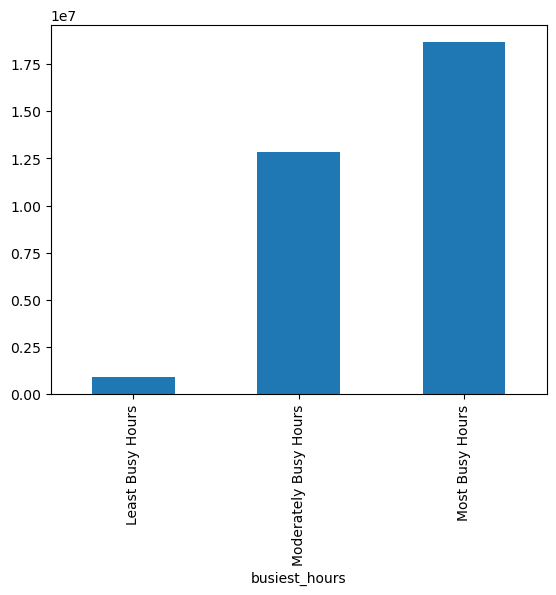

In [31]:
# Create a bar chart
df['busiest_hours'].value_counts().sort_index().plot.bar()

### 2.1.5. order_hour_of_day_week

In [32]:
# Ensure 'order_day_of_week' and 'order_hour_of_day' are already categorical
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hour_order = list(range(24))  # Hours from 0 to 23

# Generate ordered category combinations (Day - Hour)
ordered_combinations = [f"{day} - {hour}" for day in day_order for hour in hour_order]

# Ensure 'order_time_of_day_week' is a string before assigning categories
df['order_hour_of_day_week'] = df['order_day_of_week'].astype(str) + " - " + df['order_hour_of_day'].astype(str)

# Convert to an ordered categorical variable
df['order_hour_of_day_week'] = pd.Categorical(df['order_hour_of_day_week'],
                                                             categories=ordered_combinations,
                                                             ordered=True)

In [33]:
# Dimensions
df.shape

(32403719, 25)

In [34]:
# Confirm dtype
print(df['order_hour_of_day_week'].dtype)

category


In [35]:
# Count the number of orders per hour of day of week
order_combined_counts = df['order_hour_of_day_week'].value_counts().sort_index()
order_combined_counts

order_hour_of_day_week
Monday - 0      29892
Monday - 1      14703
Monday - 2       8335
Monday - 3       7020
Monday - 4       6797
                ...  
Sunday - 19    198934
Sunday - 20    151995
Sunday - 21    119846
Sunday - 22     91761
Sunday - 23     57227
Name: count, Length: 168, dtype: int64

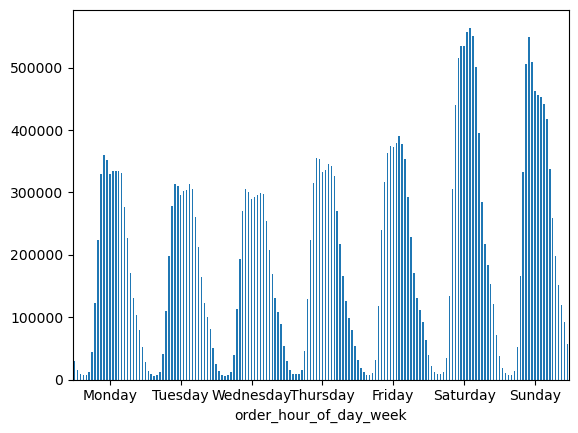

In [36]:
# Create a bar chart
ax = df['order_hour_of_day_week'].value_counts().sort_index().plot(kind='bar')

# Set x-axis labels to show only days, centered at hour 12
plt.xticks(
    ticks=[(i * 24) + 12 for i in range(len(day_order))],  # Midpoint of each day
    labels=day_order,  # ["Monday", "Tuesday", ...]
    rotation=0
)

# Show the plot
plt.show()

## 2.2. Prices

### 2.2.1. prices (product level)

In [37]:
# Get the maximum price per product 
max_prices = df.groupby('product_id')['prices'].max().reset_index()

# Count the number of products for each unique price
price_counts = max_prices['prices'].value_counts().sort_index()
price_counts

prices
1.0     116
1.1     296
1.2     296
1.3     286
1.4     321
       ... 
24.6      4
24.7      5
24.8      5
24.9      6
25.0      5
Name: count, Length: 241, dtype: int64

In [38]:
max_prices['prices'].describe()

count    49657.000000
mean         7.680421
std          4.199349
min          1.000000
25%          4.100000
50%          7.100000
75%         11.100000
max         25.000000
Name: prices, dtype: float64

<Axes: ylabel='Frequency'>

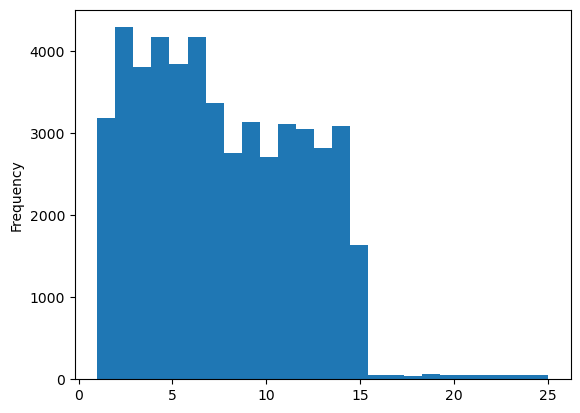

In [39]:
# Plot histogram
max_prices['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices'>

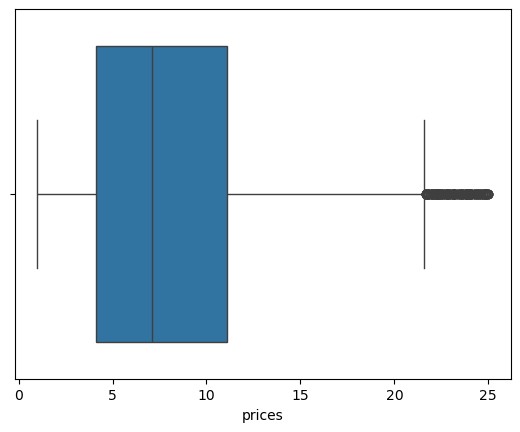

In [40]:
# Plot boxplot
sns.boxplot(x=max_prices['prices'])

### 2.2.2. prices (order level)

In [41]:
# Count the number of products ordered for each unique price
df['prices'].value_counts().sort_index()

prices
1.0     115143
1.1     242782
1.2     256258
1.3     425691
1.4     392209
         ...  
24.6      1962
24.7      7283
24.8       410
24.9      5781
25.0     13772
Name: count, Length: 241, dtype: int64

In [42]:
df['prices'].describe()

count    3.240372e+07
mean     7.792048e+00
std      4.242308e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

<Axes: ylabel='Frequency'>

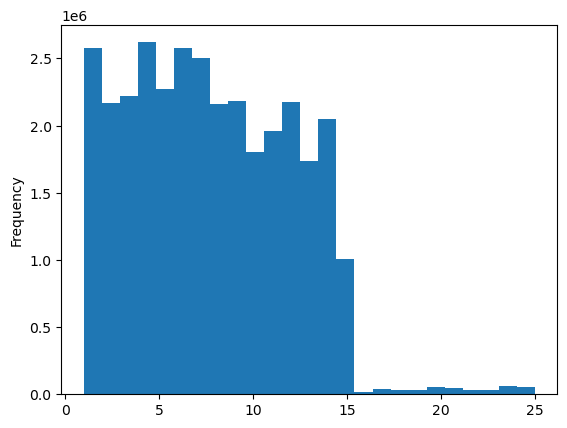

In [43]:
# Plot histogram
df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices'>

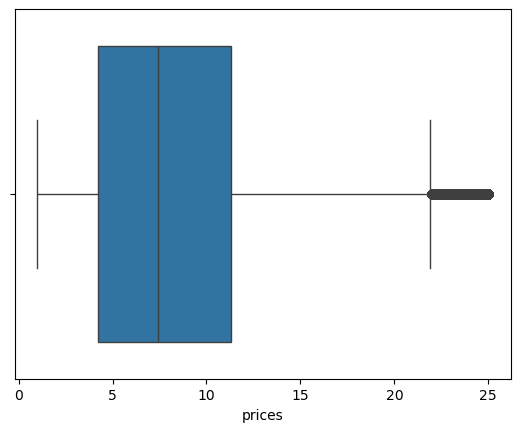

In [44]:
# Plot boxplot
sns.boxplot(x=df['prices'])

### 2.2.3. price_label

In [45]:
#Define the conditions
conditions = [
    df['prices'] <= 4.2,
    (df['prices'] > 4.2) & (df['prices'] <= 11.3),
    (df['prices'] > 11.3) & (df['prices'] <= 15),
    df['prices'] > 15
]

#Define corresponding labels
choices = ['Low Price', 'Mid Price', 'High Price', 'Premium Price']

#Create new variable based on the conditions
df['price_label'] = np.select(conditions, choices, default = 'Unknown')

# Define the desired categorical order
order = ['Low Price', 'Mid Price', 'High Price', 'Premium Price']

# Convert to an ordered categorical variable
df['price_label'] = pd.Categorical(df['price_label'], categories=order, ordered=True)

In [46]:
# Dimensions
df.shape

(32403719, 26)

In [47]:
# Confirm dtype
print(df['price_label'].dtype)

category


In [48]:
# Frequency distribution of new variable
df['price_label'].value_counts(dropna=False).sort_index()

price_label
Low Price         8136049
Mid Price        16369065
High Price        7486054
Premium Price      412551
Name: count, dtype: int64

<Axes: xlabel='price_label'>

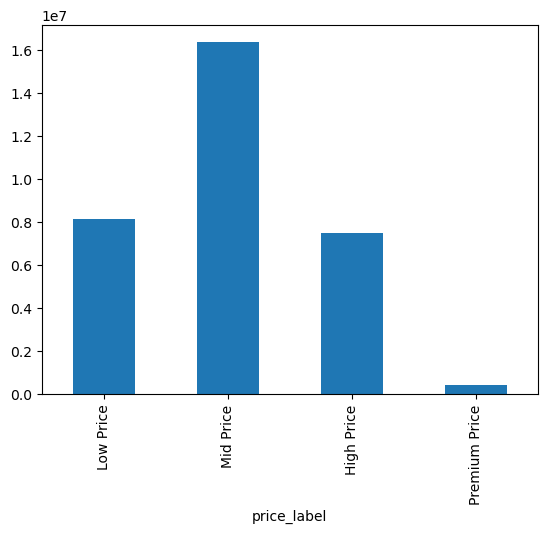

In [49]:
# Create a bar chart
df['price_label'].value_counts().sort_index().plot.bar()

### 2.2.4. high_price_days

In [50]:
# Define mapping for grouping days
day_group_mapping = {
    "Friday": "Fri & Sat",
    "Saturday": "Fri & Sat",
    "Monday": "Other Days",
    "Tuesday": "Other Days",
    "Wednesday": "Other Days",
   "Thursday": "Other Days",
    "Sunday": "Other Days"
}

# Convert 'order_day_of_week' to a new categorical variable with grouped categories
df['high_price_days'] = df['order_day_of_week'].map(day_group_mapping)

# Ensure 'day_group' is categorical with correct order
df['high_price_days'] = pd.Categorical(df['high_price_days'], categories=["Other Days", "Fri & Sat"], ordered=True)

In [51]:
# Dimensions
df.shape

(32403719, 27)

In [52]:
# Confirm dtype
print(df['high_price_days'].dtype)

category


In [53]:
# Frequency distribution of new variable
df['high_price_days'].value_counts(dropna=False).sort_index()

high_price_days
Other Days    21703505
Fri & Sat     10700214
Name: count, dtype: int64

<Axes: xlabel='high_price_days'>

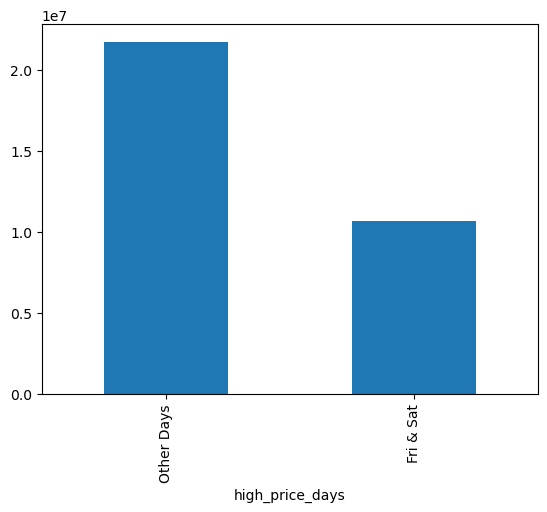

In [54]:
# Create a bar chart
df['high_price_days'].value_counts().sort_index().plot.bar()

## 2.3. Products

### 2.3.1. department_id

In [55]:
# Count the number of products ordered per department
df[['department']].value_counts().sort_index()

department     
alcohol             153696
babies              423794
bakery             1172428
beverages          2688115
breakfast           703033
bulk                 34573
canned goods       1068058
dairy eggs         5398185
deli               1051249
dry goods pasta     866627
frozen             2234743
household           738666
international       269253
meat seafood        708927
missing              69145
other                36291
pantry             1875369
personal care       447010
pets                 97716
produce            9479291
snacks             2887550
Name: count, dtype: int64

In [56]:
# Convert to a categorical variable
df['department'] = pd.Categorical(df['department'])

In [57]:
# Confirm dtype
print(df['department'].dtype)

category


In [58]:
# Count the number of orders per department
df['department'].value_counts().sort_index()

department
alcohol             153696
babies              423794
bakery             1172428
beverages          2688115
breakfast           703033
bulk                 34573
canned goods       1068058
dairy eggs         5398185
deli               1051249
dry goods pasta     866627
frozen             2234743
household           738666
international       269253
meat seafood        708927
missing              69145
other                36291
pantry             1875369
personal care       447010
pets                 97716
produce            9479291
snacks             2887550
Name: count, dtype: int64

<Axes: xlabel='department'>

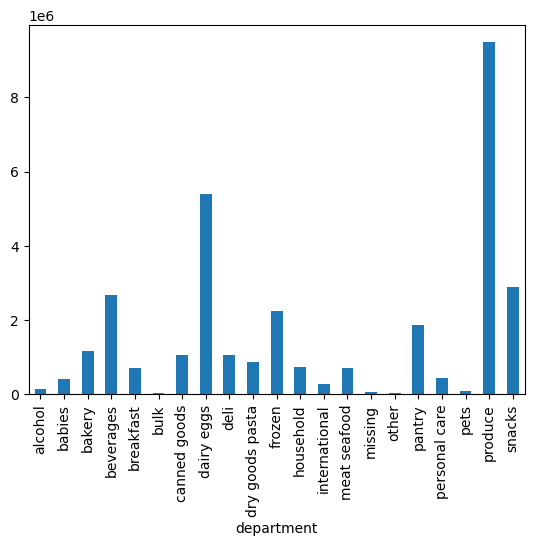

In [59]:
# Create a bar chart
df['department'].value_counts().sort_index().plot.bar()

### 2.3.2. product_category

##### Categories can be allocated as follows:
- beverages as beverages [7]
- alcoholic as alcoholic beverages [5]
- dairy eggs, deli, meat seafood, produce & bakery as perishables [16,20,12,4,3]
- frozen, bulk, canned goods, dry goods pasta, pantry, snacks & breakfast as non-perishables [1,10,15,9,13,19,14]
- household as household [17]
- personal care as personal care [11]
- pets as pets [8]
- babies as babies [18]
- international, missing & other as miscellaneous [6,21,2]

In [60]:
#Allocate departments
categories = []
for value in df['department_id']:
  if value in [7]:
    categories.append('beverages')
  elif value in [5]:
    categories.append('alcoholic beverages')
  elif value in [16,20,12,4,3]:
    categories.append('perishables')
  elif value in [1,10,15,9,13,19,14]:
    categories.append('non-perishables')
  elif value in [17]:
    categories.append('household')
  elif value in [11]:
    categories.append('personal care')
  elif value in [8]:
    categories.append('pets')
  elif value in [18]:
    categories.append('babies')
  elif value in [6,21,2]:
    categories.append('miscellaneous')
  else:
    categories.append('unallocated')

#Create new variable and set it equal to results of loop
df['product_category'] = categories

# Convert to a categorical variable
df['product_category'] = pd.Categorical(df['product_category'])

In [61]:
# Dimensions
df.shape

(32403719, 28)

In [62]:
# Confirm dtype
print(df['product_category'].dtype)

category


In [63]:
# Frequency distribution of new variable
df['product_category'].value_counts(dropna=False).sort_index()

product_category
alcoholic beverages      153696
babies                   423794
beverages               2688115
household                738666
miscellaneous            374689
non-perishables         9669953
perishables            17810080
personal care            447010
pets                      97716
Name: count, dtype: int64

<Axes: xlabel='product_category'>

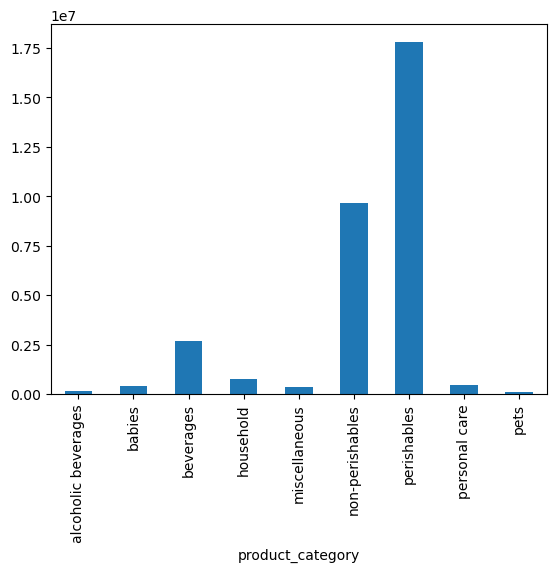

In [64]:
# Create a bar chart
df['product_category'].value_counts().sort_index().plot.bar()

## 2.4. Customer Profiling

### 2.4.1. max_order_per_user

In [65]:
# Group by 'user_id' and return the 'max_order' number in new column
df['max_order_per_user'] = df.groupby(['user_id'])['user_order_count'].transform('max')

In [66]:
# Dimensions
df.shape

(32403719, 29)

In [67]:
# Confirm dtype
print(df['max_order_per_user'].dtype)

int64


In [68]:
# Frequency distribution of new variable
df['max_order_per_user'].value_counts(dropna=False).sort_index()

max_order_per_user
1           5
2           6
3      686702
4      753488
5      793082
       ...   
95      59877
96      40453
97      44949
98      44587
99    1171331
Name: count, Length: 99, dtype: int64

In [69]:
df['max_order_per_user'].describe()

count    3.240372e+07
mean     3.305262e+01
std      2.515541e+01
min      1.000000e+00
25%      1.300000e+01
50%      2.600000e+01
75%      4.700000e+01
max      9.900000e+01
Name: max_order_per_user, dtype: float64

<Axes: ylabel='Frequency'>

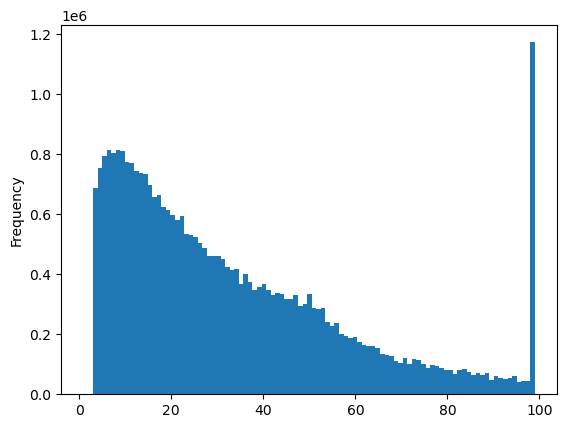

In [70]:
# Plot histogram
df['max_order_per_user'].plot.hist(bins = 99)




##### Observation
- Data appears to be truncated at 99 orders

<Axes: xlabel='max_order_per_user'>

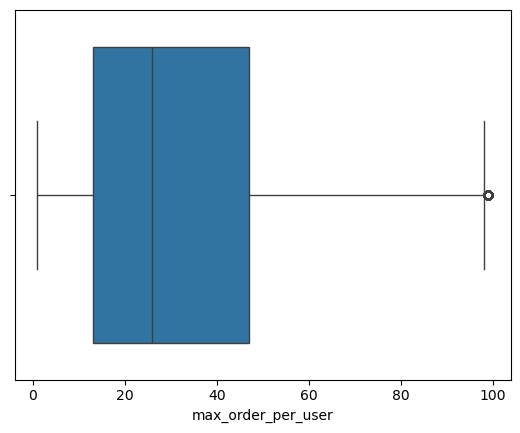

In [71]:
# Plot boxplot
sns.boxplot(x=df['max_order_per_user'])

### 2.4.2. activity_flag

In [72]:
# Define conditions
conditions = [
    df['max_order_per_user'] <= 13,
    (df['max_order_per_user'] > 13) & (df['max_order_per_user'] <= 47), 
    df['max_order_per_user'] > 47 
]

# Define corresponding labels
labels = ['Low Activity', 'Moderate Activity', 'High Activity']

# Assign flags using np.select()
df['activity_flag'] = np.select(conditions, labels, default = 'Unknown')

# Define the desired categorical order
activity_order = ['Low Activity', 'Moderate Activity', 'High Activity']

# Convert to an ordered categorical variable
df['activity_flag'] = pd.Categorical(df['activity_flag'], categories=activity_order, ordered=True)

In [73]:
# Dimensions
df.shape

(32403719, 30)

In [74]:
# Confirm dtype
print(df['activity_flag'].dtype)

category


In [75]:
# Frequency distribution of new variable
df['activity_flag'].value_counts(dropna=False).sort_index()

activity_flag
Low Activity          8493912
Moderate Activity    15940760
High Activity         7969047
Name: count, dtype: int64

In [76]:
#Group by loyalty_flag and count the unique user_ids per flag
df.groupby('activity_flag', observed=False)['user_id'].nunique()

activity_flag
Low Activity         131129
Moderate Activity     63037
High Activity         12043
Name: user_id, dtype: int64

<Axes: xlabel='activity_flag'>

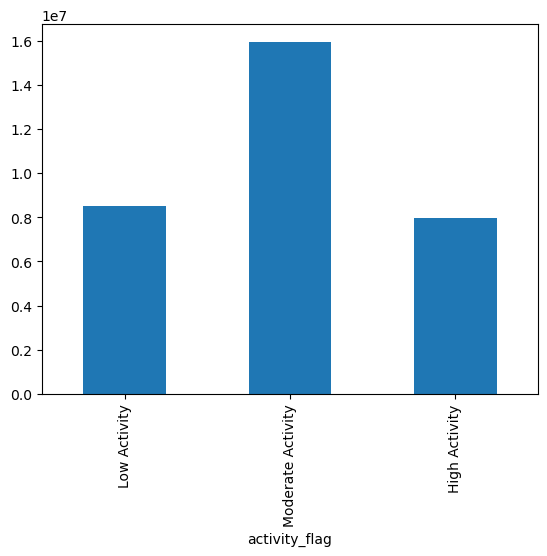

In [77]:
# Create a bar chart
df['activity_flag'].value_counts().sort_index().plot.bar()

### 2.4.3. avg_price_ordered_per_user

In [78]:
# Group by 'user_id' and return the average price in a new column
df['avg_price_ordered_per_user'] = df.groupby(['user_id'])['prices'].transform('mean')

In [79]:
# Dimensions
df.shape

(32403719, 31)

In [80]:
# Confirm dtype
print(df['avg_price_ordered_per_user'].dtype)

float64


In [81]:
# Frequency distribution of new variable
df['avg_price_ordered_per_user'].value_counts(dropna=False).sort_index()

avg_price_ordered_per_user
1.000000     18
1.100000     27
1.200000      8
1.262500      8
1.300000     30
             ..
18.233333     9
19.400000     9
20.000000     3
20.114286     7
23.200000     3
Name: count, Length: 128178, dtype: int64

In [82]:
df['avg_price_ordered_per_user'].describe()

count    3.240372e+07
mean     7.792048e+00
std      7.348679e-01
min      1.000000e+00
25%      7.379634e+00
50%      7.813158e+00
75%      8.230503e+00
max      2.320000e+01
Name: avg_price_ordered_per_user, dtype: float64

<Axes: ylabel='Frequency'>

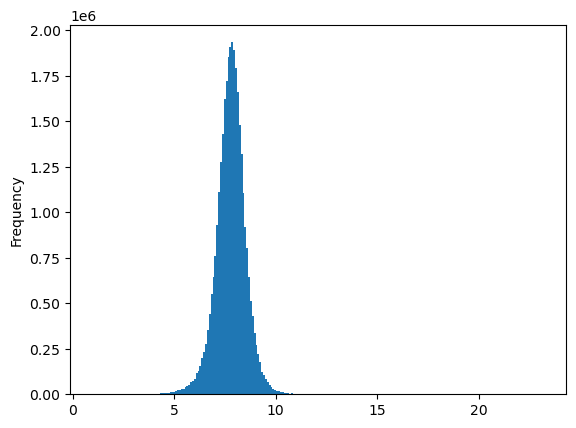

In [83]:
# Plot histogram
df['avg_price_ordered_per_user'].plot.hist(bins = 241)

<Axes: xlabel='avg_price_ordered_per_user'>

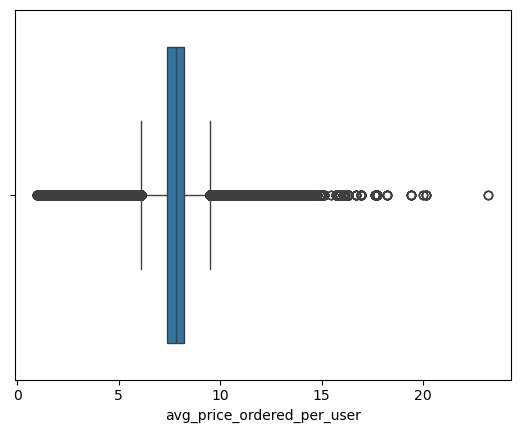

In [84]:
# Plot boxplot
sns.boxplot(x=df['avg_price_ordered_per_user'])

In [85]:
# Filter out products priced $15 and above
df_filtered = df[df['prices'] < 15][['prices', 'avg_price_ordered_per_user']].copy()

# Display first few rows to verify
df_filtered.head()

,prices,avg_price_ordered_per_user
0,9.0,6.367797
1,12.5,6.367797
2,4.4,6.367797
3,4.7,6.367797
4,1.0,6.367797


In [86]:
# Calculate Q1, Q3, and IQR
Q1 = df_filtered['avg_price_ordered_per_user'].quantile(0.25)
Q3 = df_filtered['avg_price_ordered_per_user'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the Upper Whisker
upper_whisker = Q3 + (1.5 * IQR)

# Print results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Upper Whisker: {upper_whisker}")

Q1: 7.375367647058823
Q3: 8.225
IQR: 0.8496323529411764
Upper Whisker: 9.499448529411765


In [87]:
# Calculate Q1, Q3, and IQR
Q1 = df['avg_price_ordered_per_user'].quantile(0.25)
Q3 = df['avg_price_ordered_per_user'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the Upper Whisker
upper_whisker = Q3 + (1.5 * IQR)

# Print results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Upper Whisker: {upper_whisker}")

Q1: 7.379634464751958
Q3: 8.230503144654088
IQR: 0.8508686799021303
Upper Whisker: 9.506806164507283


### 2.4.4. spending_flag

In [88]:
# Define conditions (using price_label categories)
conditions = [
    df['avg_price_ordered_per_user'] <= 7.38,
    (df['avg_price_ordered_per_user'] > 7.38) & (df['avg_price_ordered_per_user'] <= 8.23),
    (df['avg_price_ordered_per_user'] > 8.23) & (df['avg_price_ordered_per_user'] <= 9.49),
    df['avg_price_ordered_per_user'] > 9.49
]
# Define corresponding labels
labels = ['Low Spender', 
          'Moderate Spender', 
          'High Spender',
          'Premium Spender']

# Assign flags using np.select()
df['spending_flag'] = np.select(conditions, labels, default = 'Unknown')

# Define the desired categorical order
spending_order = ['Low Spender', 
          'Moderate Spender', 
          'High Spender',
          'Premium Spender']

# Convert to an ordered categorical variable
df['spending_flag'] = pd.Categorical(df['spending_flag'], categories=spending_order, ordered=True)

In [89]:
# Dimensions
df.shape

(32403719, 32)

In [90]:
# Confirm dtype
print(df['spending_flag'].dtype)

category


In [91]:
# Frequency distribution of new variable
df['spending_flag'].value_counts(dropna=False).sort_index()

spending_flag
Low Spender          8104957
Moderate Spender    16189803
High Spender         7723577
Premium Spender       385382
Name: count, dtype: int64

In [92]:
#Group by loyalty_flag and count the unique user_ids per flag
df.groupby('spending_flag', observed=False)['user_id'].nunique()

spending_flag
Low Spender         63734
Moderate Spender    82508
High Spender        52549
Premium Spender      7418
Name: user_id, dtype: int64

<Axes: xlabel='spending_flag'>

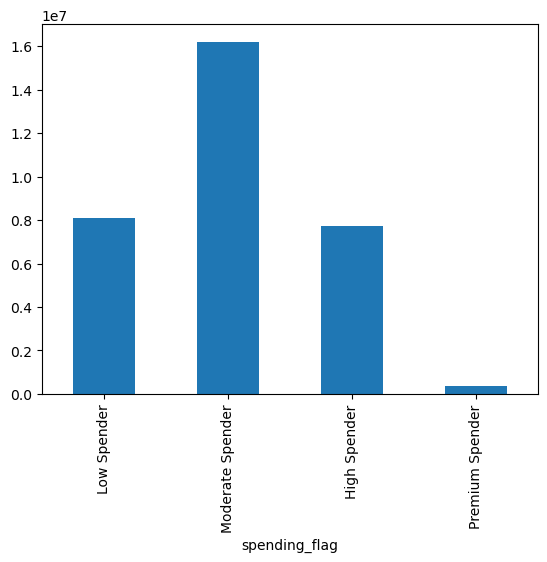

In [93]:
# Create a bar chart
df['spending_flag'].value_counts().sort_index().plot.bar()

### 2.4.5. median_days_since_last_order

In [94]:
# Group by 'user_id' and return the mean of days since last order
df['median_days_since_last_order'] = df.groupby(['user_id'])['days_since_last_order'].transform('median')

In [95]:
# Dimensions
df.shape

(32403719, 33)

In [96]:
# Confirm dtype
print(df['median_days_since_last_order'].dtype)

float64


In [97]:
# Frequency distribution of new variable
df['median_days_since_last_order'].value_counts(dropna=False).sort_index()

median_days_since_last_order
0.0       34240
0.5         235
1.0      152114
1.5        1684
2.0      561162
         ...   
28.5       6491
29.0     136905
29.5       5095
30.0    1683797
NaN           5
Name: count, Length: 62, dtype: int64

In [98]:
#Variable includes 5 NaN values where days_since_last-order is Nan - Include under Rare Shopper
df_nan = df[df['median_days_since_last_order'].isna()]
df_nan

,order_id,user_id,user_order_count,order_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,product_id,add_to_cart_order,reordered,...,busiest_hours,order_hour_of_day_week,price_label,high_price_days,product_category,max_order_per_user,activity_flag,avg_price_ordered_per_user,spending_flag,median_days_since_last_order
25156010,895835,159838,1,Saturday,17,NaN,True,22198,1,0,...,Moderately Busy Hours,Saturday - 17,Low Price,Fri & Sat,household,1,Low Activity,7.42,Moderate Spender,NaN
25156011,895835,159838,1,Saturday,17,NaN,True,23695,2,0,...,Moderately Busy Hours,Saturday - 17,Mid Price,Fri & Sat,non-perishables,1,Low Activity,7.42,Moderate Spender,NaN
25156012,895835,159838,1,Saturday,17,NaN,True,10749,3,0,...,Moderately Busy Hours,Saturday - 17,Mid Price,Fri & Sat,perishables,1,Low Activity,7.42,Moderate Spender,NaN
25156013,895835,159838,1,Saturday,17,NaN,True,21334,5,0,...,Moderately Busy Hours,Saturday - 17,Mid Price,Fri & Sat,perishables,1,Low Activity,7.42,Moderate Spender,NaN
25156014,895835,159838,1,Saturday,17,NaN,True,33401,6,0,...,Moderately Busy Hours,Saturday - 17,High Price,Fri & Sat,perishables,1,Low Activity,7.42,Moderate Spender,NaN


In [99]:
df['median_days_since_last_order'].describe()

count    3.240371e+07
mean     1.039772e+01
std      7.131751e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.300000e+01
max      3.000000e+01
Name: median_days_since_last_order, dtype: float64

<Axes: ylabel='Frequency'>

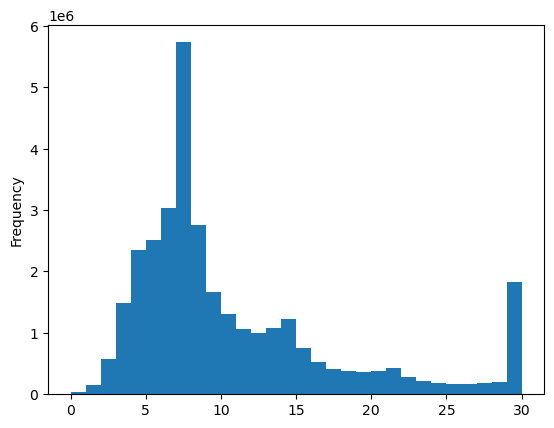

In [100]:
# Plot histogram
df['median_days_since_last_order'].plot.hist(bins = 30)

<Axes: xlabel='median_days_since_last_order'>

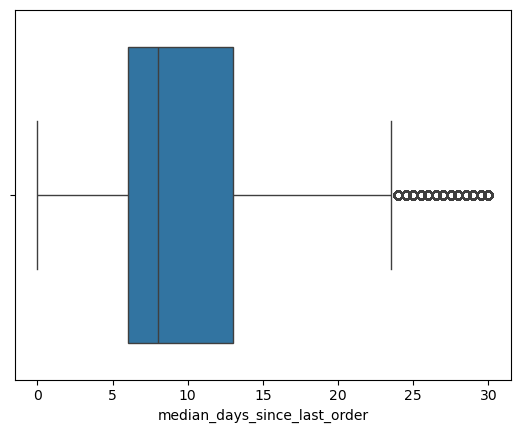

In [101]:
# Plot boxplot
sns.boxplot(x=df['median_days_since_last_order'])

In [102]:
print(df['max_order_per_user'].nunique())  # Should be > 1

99


### 2.4.6. frequency_flag

In [103]:
# Define conditions
conditions = [
    df['median_days_since_last_order'] <= 6,
    (df['median_days_since_last_order'] > 6) & (df['median_days_since_last_order'] <= 13),
    df['median_days_since_last_order'] > 13,
    df['median_days_since_last_order'].isna()
]

# Define corresponding labels
labels = ['Frequent Shopper', 'Occasional Shopper', 'Rare Shopper',  'Rare Shopper']

# Assign loyalty flags using np.select()
df['frequency_flag'] = np.select(conditions, labels, default = 'Unknown')

# Define the desired categorical order
frequency_order = ['Rare Shopper', 'Occasional Shopper', 'Frequent Shopper']

# Convert to an ordered categorical variable
df['frequency_flag'] = pd.Categorical(df['frequency_flag'], categories=frequency_order, ordered=True)

In [104]:
# Dimensions
df.shape

(32403719, 34)

In [105]:
# Confirm dtype
print(df['frequency_flag'].dtype)

category


In [106]:
# Frequency distribution of new variable
df['frequency_flag'].value_counts(dropna=False).sort_index()

frequency_flag
Rare Shopper           7689526
Occasional Shopper    14622992
Frequent Shopper      10091201
Name: count, dtype: int64

In [107]:
#Group by loyalty_flag and count the unique user_ids per flag
df.groupby('frequency_flag', observed=False)['user_id'].nunique()

frequency_flag
Rare Shopper          97169
Occasional Shopper    75152
Frequent Shopper      33888
Name: user_id, dtype: int64

<Axes: xlabel='frequency_flag'>

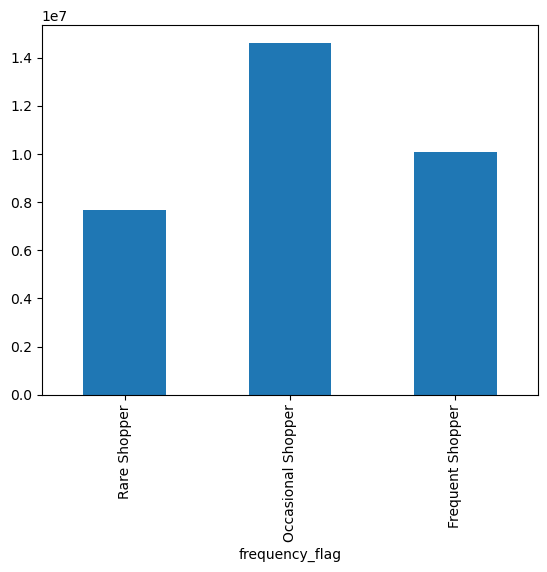

In [108]:
# Create a bar chart
df['frequency_flag'].value_counts().sort_index().plot.bar()

### 2.4.7. loyalty_score

In [109]:
# Define mapping of flags to numerical scores
spending_mapping = {'Low Spender': 1, 'Moderate Spender': 2, 'High Spender': 3, 'Premium Spender': 4}
activity_mapping = {'Low Activity': 1, 'Moderate Activity': 2, 'High Activity': 3}
frequency_mapping = {'Rare Shopper': 1, 'Occasional Shopper': 2, 'Frequent Shopper': 3}

# Map the categorical flags to numerical scores
df['spending_score'] = df['spending_flag'].map(spending_mapping)
df['activity_score'] = df['activity_flag'].map(activity_mapping)
df['frequency_score'] = df['frequency_flag'].map(frequency_mapping)

# Calculate the Total Loyalty Score
df['loyalty_score'] = (
    df['spending_score'].astype(float) +
    df['activity_score'].astype(float) +
    df['frequency_score'].astype(float)
)

In [110]:
# Dimensions
df.shape

(32403719, 38)

In [111]:
# Frequency distribution of new variable
df['spending_score'].value_counts(dropna=False).sort_index()

spending_score
1     8104957
2    16189803
3     7723577
4      385382
Name: count, dtype: int64

In [112]:
# Frequency distribution of new variable
df['activity_score'].value_counts(dropna=False).sort_index()

activity_score
1     8493912
2    15940760
3     7969047
Name: count, dtype: int64

In [113]:
# Frequency distribution of new variable
df['frequency_score'].value_counts(dropna=False).sort_index()

frequency_score
1     7689526
2    14622992
3    10091201
Name: count, dtype: int64

In [114]:
# Frequency distribution of new variable
df['loyalty_score'].value_counts(dropna=False).sort_index()

loyalty_score
3.0     1463533
4.0     3605795
5.0     6446647
6.0     8316431
7.0     6391494
8.0     4648535
9.0     1498670
10.0      32614
Name: count, dtype: int64

In [115]:
df['loyalty_score'].describe()

count    3.240372e+07
mean     6.069936e+00
std      1.499694e+00
min      3.000000e+00
25%      5.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: loyalty_score, dtype: float64

<Axes: ylabel='Frequency'>

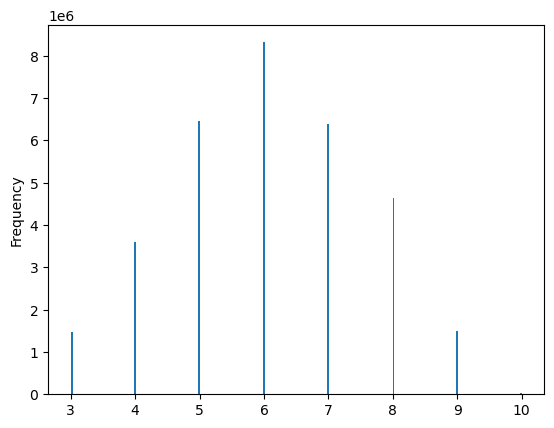

In [116]:
# Plot histogram
df['loyalty_score'].plot.hist(bins = 241)

<Axes: xlabel='loyalty_score'>

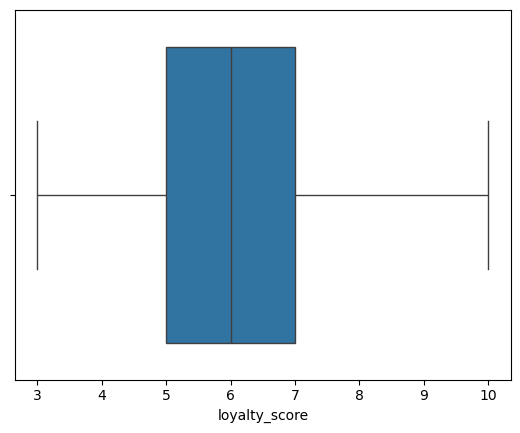

In [117]:
# Plot boxplot
sns.boxplot(x=df['loyalty_score'])

### 2.4.8. loyalty_flag

In [118]:
# Define conditions for loyalty categories
conditions = [
    (df['loyalty_score'] <= 5),
    (df['loyalty_score'] > 5) & (df['loyalty_score'] <= 7),
    (df['loyalty_score'] > 7)
]

# Define corresponding loyalty categories
labels = ['Low Loyalty', 'Moderate Loyalty', 'High Loyalty']

# Assign loyalty categories based on conditions
df['loyalty_flag'] = np.select(conditions, labels, default = 'Unknown')

# Define the desired categorical order
loyalty_order = ['Low Loyalty', 'Moderate Loyalty', 'High Loyalty']

# Convert to an ordered categorical variable
df['loyalty_flag'] = pd.Categorical(df['loyalty_flag'], categories=loyalty_order, ordered=True)

In [119]:
# Dimensions
df.shape

(32403719, 39)

In [120]:
# Confirm dtype
print(df['loyalty_flag'].dtype)

category


In [121]:
# Frequency distribution of new variable
df['loyalty_flag'].value_counts(dropna=False).sort_index()

loyalty_flag
Low Loyalty         11515975
Moderate Loyalty    14707925
High Loyalty         6179819
Name: count, dtype: int64

In [122]:
#Group by loyalty_flag and count the unique user_ids per flag
df.groupby('loyalty_flag', observed=False)['user_id'].nunique()

loyalty_flag
Low Loyalty         128224
Moderate Loyalty     65781
High Loyalty         12204
Name: user_id, dtype: int64

<Axes: xlabel='loyalty_flag'>

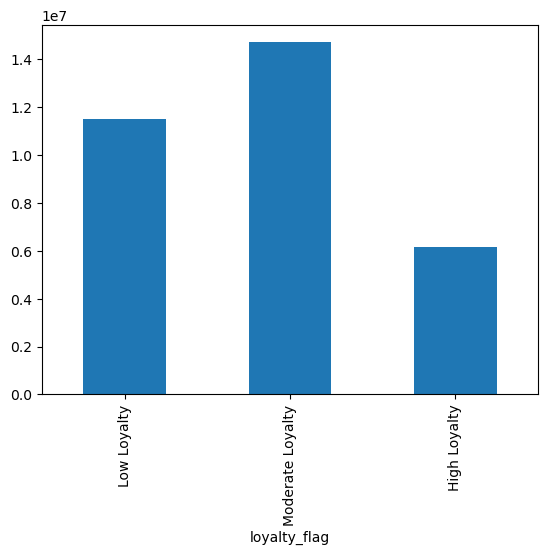

In [123]:
# Create a bar chart
df['loyalty_flag'].value_counts().sort_index().plot.bar()

## 2.5. Segmentation

### 2.5.1. region

In [124]:
# Frequency distribution of the variable 
df['state'].value_counts().sort_index()

state
Alabama                 637971
Alaska                  648487
Arizona                 653930
Arkansas                636136
California              659765
Colorado                639260
Connecticut             622998
Delaware                637000
District of Columbia    613685
Florida                 629023
Georgia                 656373
Hawaii                  632887
Idaho                   607091
Illinois                632998
Indiana                 627258
Iowa                    625475
Kansas                  637516
Kentucky                632484
Louisiana               637466
Maine                   638559
Maryland                626555
Massachusetts           646352
Michigan                630918
Minnesota               647791
Mississippi             632637
Missouri                640706
Montana                 635241
Nebraska                625771
Nevada                  636117
New Hampshire           615366
New Jersey              627644
New Mexico              654478
Ne

In [125]:
#Count values in state variable
df['state'].nunique(dropna = False)

51

In [126]:
#Allocate states to regions
region = []
for value in df['state']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    region.append('Northeast')
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    region.append('Midwest')
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    region.append('South')
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    region.append('West')
  else:
    region.append('Unallocated') 

#Assign result to a new column
df['region'] = region

# Define the desired categorical order
region_order = ['West', 'Midwest', 'South', 'Northeast']

# Convert to an ordered categorical variable
df['region'] = pd.Categorical(df['region'], categories=region_order, ordered=True)

In [127]:
# Dimensions
df.shape

(32403719, 40)

In [128]:
# Confirm dtype
print(df['region'].dtype)

category


In [129]:
# Frequency distribution of new variable
df['region'].value_counts(dropna=False).sort_index()

region
West          8292641
Midwest       7597015
South        10791513
Northeast     5722550
Name: count, dtype: int64

In [130]:
#Group by loyalty_flag and count the unique user_ids per flag
df.groupby('region', observed=False)['user_id'].nunique()

region
West         52565
Midwest      48519
South        68737
Northeast    36388
Name: user_id, dtype: int64

<Axes: xlabel='region'>

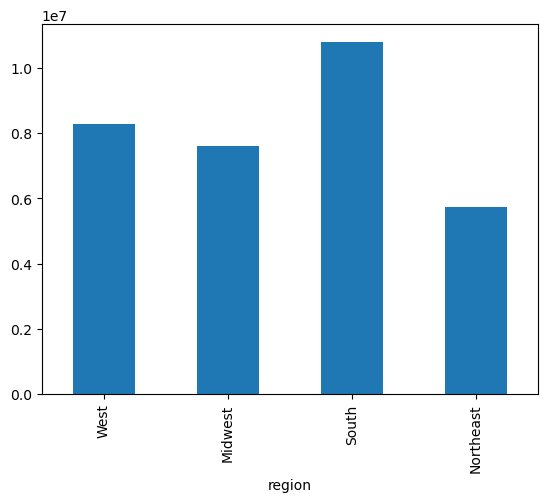

In [131]:
# Create a bar chart
df['region'].value_counts().sort_index().plot.bar()

### 2.5.2. age

In [132]:
# Frequency distribution of new variable
df['age'].value_counts().sort_index()

age
18    500446
19    519596
20    502830
21    512511
22    513815
       ...  
77    502108
78    495299
79    529724
80    515224
81    509282
Name: count, Length: 64, dtype: int64

In [133]:
df['age'].describe()

count    3.240372e+07
mean     4.946528e+01
std      1.848556e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [134]:
#Allocate age
age = []
for value in df['age']:
  if value <= 25:
    age.append('Young Adult')
  elif value <= 45:
    age.append('Adult')
  elif value <= 65:
    age.append('Middle Aged')
  else:
    age.append('Senior')

#Assign result to a new column
df['age_profile'] = age

# Define the desired categorical order
age_order = ['Young Adult', 'Adult', 'Middle Aged', 'Senior']

# Convert to an ordered categorical variable
df['age_profile'] = pd.Categorical(df['age_profile'], categories=age_order, ordered=True)

In [135]:
# Dimensions
df.shape

(32403719, 41)

In [136]:
# Confirm dtype
print(df['age_profile'].dtype)

category


In [137]:
# Frequency distribution of new variable
df['age_profile'].value_counts(dropna=False).sort_index()

age_profile
Young Adult     4045031
Adult          10155790
Middle Aged    10115107
Senior          8087791
Name: count, dtype: int64

In [138]:
#Group by loyalty_flag and count the unique user_ids per flag
df.groupby('age_profile', observed=False)['user_id'].nunique()

age_profile
Young Adult    25687
Adult          64516
Middle Aged    64422
Senior         51584
Name: user_id, dtype: int64

<Axes: xlabel='age_profile'>

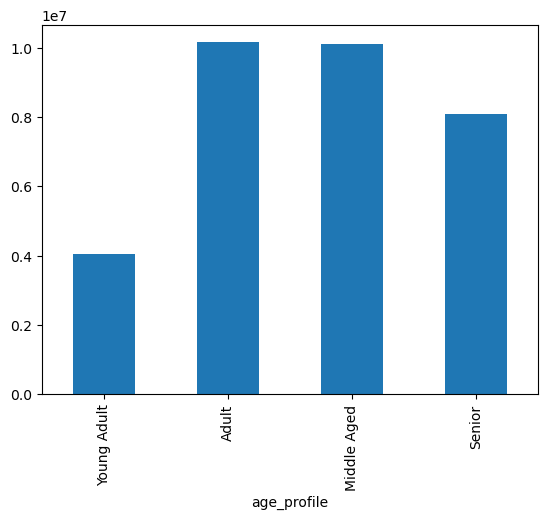

In [139]:
# Create a bar chart
df['age_profile'].value_counts().sort_index().plot.bar()

### 2.5.3. income

In [140]:
# Frequency distribution of new variable
df['income'].value_counts().sort_index()

income
25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: count, Length: 108012, dtype: int64

In [141]:
df['income'].describe()

count    3.240372e+07
mean     9.943758e+04
std      4.305685e+04
min      2.590300e+04
25%      6.700300e+04
50%      9.661700e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [142]:
#Allocate income
income = []
for value in df['income']:
  if value <= 65000:
    income.append('Low Income')
  elif value <= 125000:
    income.append('Middle Income')
  else:
    income.append('High Income')

#Assign result to a new column
df['income_profile'] = income

# Define the desired categorical order
income_order = ['Low Income', 'Middle Income', 'High Income']

# Convert to an ordered categorical variable
df['income_profile'] = pd.Categorical(df['income_profile'], categories=income_order, ordered=True)

In [143]:
# Dimensions
df.shape

(32403719, 42)

In [144]:
# Confirm dtype
print(df['income_profile'].dtype)

category


In [145]:
# Frequency distribution of new variable
df['income_profile'].value_counts(dropna=False).sort_index()

income_profile
Low Income        7520933
Middle Income    16252145
High Income       8630641
Name: count, dtype: int64

In [146]:
#Group by loyalty_flag and count the unique user_ids per flag
df.groupby('income_profile', observed=False)['user_id'].nunique()

income_profile
Low Income       59716
Middle Income    95749
High Income      50744
Name: user_id, dtype: int64

<Axes: xlabel='income_profile'>

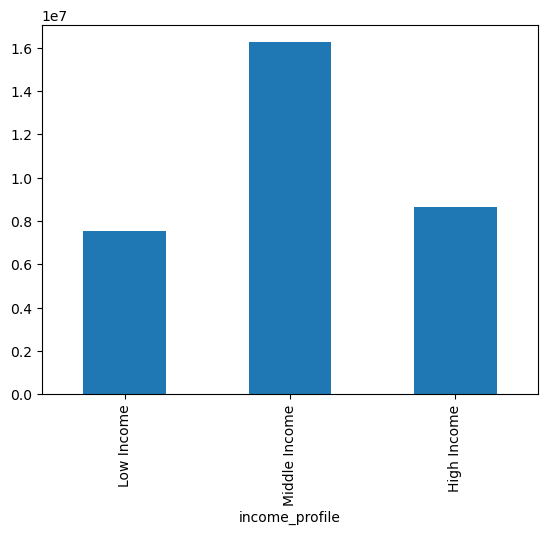

In [147]:
# Create a bar chart
df['income_profile'].value_counts().sort_index().plot.bar()

### 2.5.4. parental_status

In [148]:
# Frequency distribution of new variable
df['number_of_dependants'].value_counts().sort_index()

number_of_dependants
0    8097297
1    8080806
2    8090893
3    8134723
Name: count, dtype: int64

In [149]:
#Allocate dependents
parent = []
for value in df['number_of_dependants']:
  if value == 0:
    parent.append('non-parent')
  elif value > 0:
    parent.append('parent')
  else:
    parent.append('unallocated')

#Assign result to a new column
df['parental_status'] = parent

# Define the desired categorical order
parental_order = ['non-parent', 'parent']

# Convert to an ordered categorical variable
df['parental_status'] = pd.Categorical(df['parental_status'], categories=parental_order, ordered=True)

In [150]:
# Dimensions
df.shape

(32403719, 43)

In [151]:
# Confirm dtype
print(df['parental_status'].dtype)

category


In [152]:
# Frequency distribution of new variable
df['parental_status'].value_counts(dropna=False).sort_index()

parental_status
non-parent     8097297
parent        24306422
Name: count, dtype: int64

In [153]:
#Group by loyalty_flag and count the unique user_ids per flag
df.groupby('parental_status', observed=False)['user_id'].nunique()

parental_status
non-parent     51602
parent        154607
Name: user_id, dtype: int64

### 3.5.5. marital_status

In [154]:
# Frequency distribution of the variable 
df['marital_status'].value_counts().sort_index()

marital_status
divorced/widowed                     2771700
living with parents and siblings     1550545
married                             22755877
single                               5325597
Name: count, dtype: int64

### 3.5.6. family_status

In [155]:
#Cross variables
marital_vs_parental_status = pd.crosstab(df['marital_status'], df['parental_status'], dropna = False)
marital_vs_parental_status

parental_status,non-parent,parent
marital_status,,
divorced/widowed,2771700,0
living with parents and siblings,0,1550545
married,0,22755877
single,5325597,0


In [156]:
#Allocate family status
family = []
for value in df['marital_status']:
  if value == 'divorced/widowed':
    family.append('Single Adult')
  elif value == 'single':
    family.append('Single Adult')
  elif value == 'living with parents and siblings':
    family.append('Young Parent')
  elif value == 'married':
    family.append('Family')
  else:
    family.append('unallocated')

#Assign result to a new column
df['family_status'] = family

# Define the desired categorical order
family_order = ['Single Adult', 'Young Parent', 'Family']

# Convert to an ordered categorical variable
df['family_status'] = pd.Categorical(df['family_status'], categories=family_order, ordered=True)

In [157]:
# Dimensions
df.shape

(32403719, 44)

In [158]:
# Confirm dtype
print(df['family_status'].dtype)

category


In [159]:
# Frequency distribution of new variable
df['family_status'].value_counts(dropna=False).sort_index()

family_status
Single Adult     8097297
Young Parent     1550545
Family          22755877
Name: count, dtype: int64

In [160]:
#Group by loyalty_flag and count the unique user_ids per flag
df.groupby('family_status', observed=False)['user_id'].nunique()

family_status
Single Adult     51602
Young Parent      9701
Family          144906
Name: user_id, dtype: int64

<Axes: xlabel='family_status'>

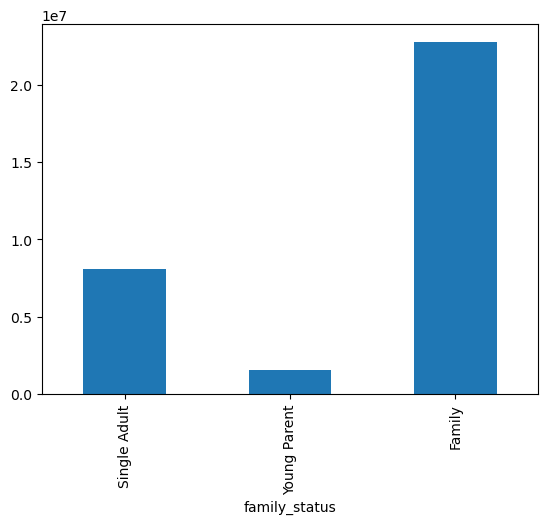

In [161]:
# Create a bar chart
df['family_status'].value_counts().sort_index().plot.bar()

# 3. Exports

In [162]:
# Dimensions
df.shape

(32403719, 44)

In [163]:
#Export merged dataset
df.to_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '07_modelled_dataset.pkl'))